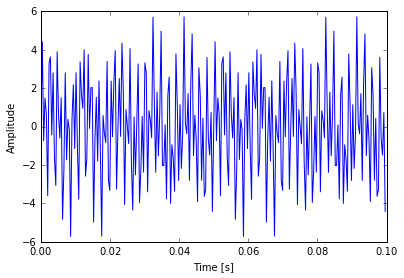

In [66]:
# import modules
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftfreq, rfft, irfft, rfftfreq
from scipy import signal

fs=2.56*1000
dt = 1/fs
t=np.arange(0,0.1,dt)

f1 = 100 #Hz
f2 = 440 #Hz
f3 = 900 #Hz
x = np.sin(2*np.pi*f1*t)+2*np.sin(2*np.pi*f2*t)+3*np.sin(2*np.pi*f3*t)

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # lower, bottom, width, height (range 0 to 1)
axes.plot(t, x)
axes.set_xlabel('Time [s]')
axes.set_ylabel('Amplitude');

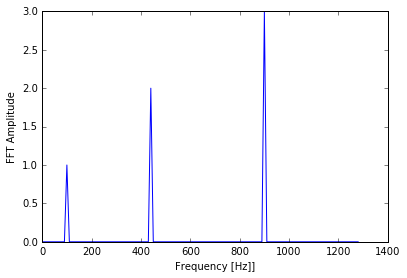

In [67]:
# FFT of impulse
N = len(t) # Number of sample points
Famp = 2*rfft(x,N)/N # FFT
f = rfftfreq(N,dt) # Frequencies

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # lower, bottom, width, height (range 0 to 1)
axes.plot(f, np.abs(Famp))
axes.set_xlabel('Frequency [Hz]]')
axes.set_ylabel('FFT Amplitude');

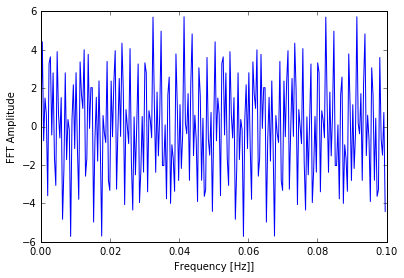

In [71]:
x_new = N*irfft(Famp,N)/2 # FFT

fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # lower, bottom, width, height (range 0 to 1)
axes.plot(t, x_new)
axes.set_xlabel('Frequency [Hz]]')
axes.set_ylabel('FFT Amplitude');

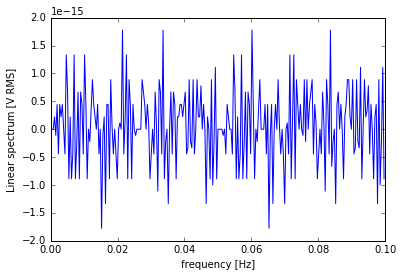

In [72]:
error = x-x_new
plt.figure()
plt.plot(t, error)
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

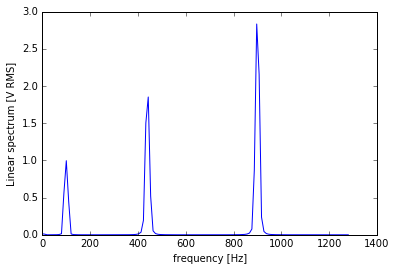

In [61]:
f, Pxx_spec = signal.welch(x, fs,nperseg = 254,noverlap=0.5*254, scaling='spectrum')
plt.figure()
plt.plot(f, np.sqrt(Pxx_spec)*np.sqrt(2))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()